In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
api_key = '38f92c99943beb806743ddaa1a5332a1'

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "/Users/samuelgiddins/Desktop/python-api-challenge/weatherpy/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities **added my own lat/long list to make the initial dataframe creation easier
lat_lngs = []
cities = []
lat_lng_list = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        lat_lng_list.append(lat_lng)
        
        
# Print the city count to confirm sufficient count
len(cities)
len(lat_lng_list)

615

In [3]:
#Create an initial city dataframe that includes lat and long for each city
cities_df1 = pd.DataFrame(lat_lng_list, cities)
cities_df = cities_df1.reset_index()
cities_df.rename(columns = {"index": "City", 0: "Latitude", 1:"Longitude"}, inplace=True)
cities_df.head()

,City,Latitude,Longitude
0,hilo,8.329366,-152.469465
1,batagay,68.713880,134.202983
2,mys shmidta,89.552832,-177.050946
3,rikitea,-14.908805,-111.889106
4,longyearbyen,86.386124,24.921447


In [4]:
#Loop through the cities and create url's, get requests, jsons, and finally, relevant data for each city
#Start with URL's
city_url_list = []
for city in range(len(cities_df['City'])):
    city_url = 'https://api.openweathermap.org/data/2.5/weather?lat=' + str(cities_df.loc[city]['Latitude']) + '&lon=' + str(cities_df.loc[city]['Longitude']) + '&appid=' + api_key
    city_url_list.append(city_url)
    

In [5]:
#Next, responses
city_response_list = []
city_number = 0
for city in range(len(cities_df['City'])):
    city_number += 1
    city_response = requests.get(city_url_list[city])
    city_response_list.append(city_response)
    print(city_number, cities[city])

1 hilo
2 batagay
3 mys shmidta
4 rikitea
5 longyearbyen
6 bakel
7 makokou
8 kpandae
9 arraial do cabo
10 ushuaia
11 albany
12 atuona
13 smithers
14 nador
15 new norfolk
16 ilulissat
17 taolanaro
18 cape town
19 labrea
20 mataura
21 grand river south east
22 punta arenas
23 winburg
24 tokonou
25 buala
26 mocuba
27 vizinga
28 olafsvik
29 kapaa
30 banjar
31 sao paulo de olivenca
32 sao filipe
33 nadym
34 kudahuvadhoo
35 persianovskiy
36 rocha
37 majene
38 kodiak
39 pontianak
40 mar del plata
41 kamenskoye
42 ponta do sol
43 port alfred
44 lebu
45 faanui
46 hermanus
47 tigil
48 sur
49 bredasdorp
50 khatanga
51 zalantun
52 broken hill
53 kamenka
54 lososina
55 bluff
56 isangel
57 thompson
58 vaini
59 bethel
60 hobart
61 saskylakh
62 tambopata
63 iralaya
64 jalu
65 tommot
66 victoria
67 qaanaaq
68 necochea
69 busselton
70 hithadhoo
71 mayumba
72 riedlingen
73 ahuimanu
74 simpang
75 norman wells
76 basco
77 abu jubayhah
78 kavieng
79 hofn
80 iqaluit
81 tuktoyaktuk
82 khilok
83 yalvac
84 omsuk

In [6]:
#JSONs
city_json_list = []
for city in range(len(cities_df['City'])):
    city_json = city_response_list[city].json()
    city_json_list.append(city_json)

In [7]:
#Create lists to store relevant weather metrics
temp_list = []
humidity_list = []
clouds_list = []
wind_list = []

#Loop through cities and store these metrics to each list
for city in range(len(cities_df['City'])):
    temp = ((((city_json_list[city]['main']['temp_max']) - 273.15) * 9)/5) + 32
    temp_list.append(temp)
    
    humidity = city_json_list[city]['main']['humidity']
    humidity_list.append(humidity)
    
    clouds = city_json_list[city]['clouds']['all']
    clouds_list.append(clouds)
    
    wind_speed = city_json_list[city]['wind']['speed']
    wind_list.append(wind_speed)

In [8]:
#add the relevant data extracted from the loops to the initial data frame
cities_df['Max Temperature (F)'] = temp_list
cities_df['Humidity'] = humidity_list
cities_df['Cloudiness'] = clouds_list
cities_df['Wind Speed'] = wind_list

In [9]:
cities_df.head()

,City,Latitude,Longitude,Max Temperature (F),Humidity,Cloudiness,Wind Speed
0,hilo,8.329366,-152.469465,82.9688,61,94,1.280
1,batagay,68.713880,134.202983,17.5640,63,100,1.896
2,mys shmidta,89.552832,-177.050946,18.5828,95,100,3.110
3,rikitea,-14.908805,-111.889106,72.4928,70,18,5.870
4,longyearbyen,86.386124,24.921447,25.1708,96,100,3.420


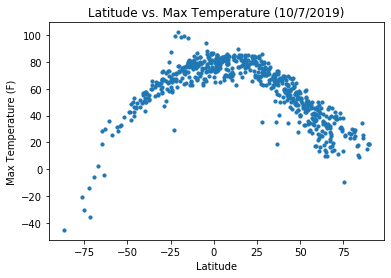

In [15]:
#Scatter #1
cities_df.plot(kind='scatter', x='Latitude', y='Max Temperature (F)', s=10)
plt.title("Latitude vs. Max Temperature (10/7/2019)")
plt.savefig("lat_temp.png")
plt.show()

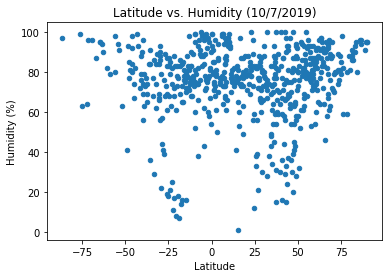

In [16]:
#Scatter #2
cities_df.plot(kind='scatter', x='Latitude', y='Humidity', s=20)
plt.title("Latitude vs. Humidity (10/7/2019)")
plt.ylabel("Humidity (%)")
plt.savefig("lat_humidity.png")
plt.show()

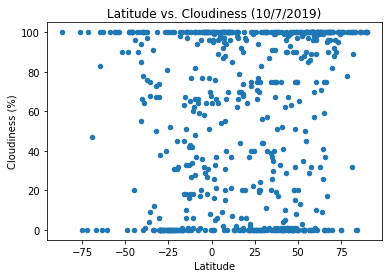

In [17]:
#Scatter #3
cities_df.plot(kind='scatter', x='Latitude', y='Cloudiness', s=20)
plt.title("Latitude vs. Cloudiness (10/7/2019)")
plt.ylabel("Cloudiness (%)")
plt.savefig("lat_cloudiness.png")
plt.show()

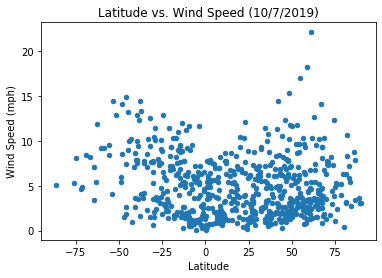

In [18]:
#Scatter #4
cities_df.plot(kind='scatter', x='Latitude', y='Wind Speed', s=20)
plt.title("Latitude vs. Wind Speed (10/7/2019)")
plt.ylabel("Wind Speed (mph)")
plt.savefig("lat_windspeed.png")
plt.show()

In [14]:
#Write dataframe results to output csv file
cities_df.to_csv("/Users/samuelgiddins/Desktop/python-api-challenge/weatherpy/cities.csv")

In [19]:
#Summary

##1. On October 7th 2019, there was a very clear correlation between close proximity to the equator and hot temperatures.

##2. On October 7th 2019, there was a loose correlation between close proximity to the equator and higher humidity.

##3. On October 7th 2019, the highest wind speeds of cities close to the equator were not as high as those further from the equator.